In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys, os
# import sklearn
# from sklearn import preprocessing
%matplotlib inline
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.python.framework import ops
import math

In [2]:
def read_csv_file(filepath):
    return pd.read_csv(filepath, sep=', ', delimiter=',', header='infer')

wind_data = read_csv_file('Data/2015 to 2018 wind.csv')

wind_data['LON'] = wind_data.LON.apply(lambda x:-x)

def Check(df):
    print('shape:' ,df.shape)
    return df.head()


Check(wind_data)

shape: (109700, 12)


,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M,WS50M_RANGE,WD50M
0,32.75,124.25,2015,1,1,0.01,0.007471,71.99,102.07,14.90,4.22,329.35
1,32.75,123.75,2015,1,1,0.00,0.007259,71.27,102.06,14.61,4.28,326.40
2,32.75,123.25,2015,1,1,0.00,0.007055,70.22,102.04,14.39,4.54,324.64
3,32.75,122.75,2015,1,1,0.00,0.006846,68.94,102.02,14.21,4.72,323.93
4,32.75,122.25,2015,1,1,0.00,0.006663,67.52,102.01,14.12,4.86,322.88


In [3]:
wind_data.dtypes

LAT            float64
LON            float64
YEAR             int64
MO               int64
DY               int64
PRECTOT        float64
QV2M           float64
RH2M           float64
PS             float64
T2M            float64
WS50M_RANGE    float64
WD50M          float64
dtype: object

In [4]:
def Replace_witn_nan(df, null_denoter):
    df = df.replace(to_replace=null_denoter, value=np.nan)
    return df

def Check_NAN(df):
    return df.isnull().sum()

Replace_witn_nan(wind_data, -999.0 or 'nan' or "NAN" or 'NA')

Check_NAN(wind_data)

LAT            0
LON            0
YEAR           0
MO             0
DY             0
PRECTOT        0
QV2M           0
RH2M           0
PS             0
T2M            0
WS50M_RANGE    0
WD50M          0
dtype: int64

In [5]:
def Add_Date_Column(df):
    Date = pd.DataFrame({'year': df['YEAR'],
                       'month': df['MO'],
                       'day': df['DY']})
    Date = pd.to_datetime(Date)
    df['DATE'] = Date
    return df

wind_data = Add_Date_Column(wind_data)

Check(wind_data)

shape: (109700, 13)


,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M,WS50M_RANGE,WD50M,DATE
0,32.75,124.25,2015,1,1,0.01,0.007471,71.99,102.07,14.90,4.22,329.35,2015-01-01
1,32.75,123.75,2015,1,1,0.00,0.007259,71.27,102.06,14.61,4.28,326.40,2015-01-01
2,32.75,123.25,2015,1,1,0.00,0.007055,70.22,102.04,14.39,4.54,324.64,2015-01-01
3,32.75,122.75,2015,1,1,0.00,0.006846,68.94,102.02,14.21,4.72,323.93,2015-01-01
4,32.75,122.25,2015,1,1,0.00,0.006663,67.52,102.01,14.12,4.86,322.88,2015-01-01


In [6]:
degree_celcius =  u"\u2103"
degree = u'\xb0'
square = '\u00b2'

In [7]:
wind_data.columns = ['Latitude (' + degree + 'N)', 'Longitude (' + degree + 'W)', 'Year', 'Month', 'Day', 'Precepitation (mm/day)', \
                'Specific Humidity at 2m (kg/kg)','Relative Humidity at 2m (%)', 'Surface Pressure (kPa)', \
                'Temperature at 2m (' + str(degree_celcius) + ')','Wind Speed at 50m (m/s)', \
                'Wind Direction at 50m (' + degree + ')', 'Date']

In [8]:
def Drop_Column(df,column):
    df = df.drop(column, axis=1)
    return df

wind_data = Drop_Column(wind_data, ['Year', 'Month', 'Day'])

Check(wind_data)

shape: (109700, 10)


,Latitude (°N),Longitude (°W),Precepitation (mm/day),Specific Humidity at 2m (kg/kg),Relative Humidity at 2m (%),Surface Pressure (kPa),Temperature at 2m (℃),Wind Speed at 50m (m/s),Wind Direction at 50m (°),Date
0,32.75,124.25,0.01,0.007471,71.99,102.07,14.90,4.22,329.35,2015-01-01
1,32.75,123.75,0.00,0.007259,71.27,102.06,14.61,4.28,326.40,2015-01-01
2,32.75,123.25,0.00,0.007055,70.22,102.04,14.39,4.54,324.64,2015-01-01
3,32.75,122.75,0.00,0.006846,68.94,102.02,14.21,4.72,323.93,2015-01-01
4,32.75,122.25,0.00,0.006663,67.52,102.01,14.12,4.86,322.88,2015-01-01


In [9]:
All_lat = list(wind_data['Latitude (' + degree + 'N)'].unique())
All_lon = list(wind_data['Longitude (' + degree + 'W)'].unique())
Combination =  list(itertools.product(All_lat, All_lon))

In [10]:
solar_data = read_csv_file('Data/Solar Features 2015 to 2018.csv')

solar_data['LON'] = solar_data.LON.apply(lambda x:-x)

solar_data = Add_Date_Column(solar_data)

Check(solar_data)

shape: (109700, 11)


,LAT,LON,YEAR,MO,DY,ALLSKY_SFC_LW_DWN,KT_CLEAR,CLRSKY_SFC_SW_DWN,ALLSKY_TOA_SW_DWN,ALLSKY_SFC_SW_DWN,DATE
0,32.75,124.25,2015,1,1,8.28,0.40,-999.0,5.16,2.04,2015-01-01
1,32.75,123.75,2015,1,1,7.90,0.50,-999.0,5.10,2.55,2015-01-01
2,32.75,123.25,2015,1,1,7.90,0.50,-999.0,5.10,2.55,2015-01-01
3,32.75,122.75,2015,1,1,7.45,0.53,-999.0,5.15,2.71,2015-01-01
4,32.75,122.25,2015,1,1,7.45,0.53,-999.0,5.15,2.71,2015-01-01


In [11]:
solar_data.dtypes

LAT                         float64
LON                         float64
YEAR                          int64
MO                            int64
DY                            int64
ALLSKY_SFC_LW_DWN           float64
KT_CLEAR                     object
CLRSKY_SFC_SW_DWN           float64
ALLSKY_TOA_SW_DWN           float64
ALLSKY_SFC_SW_DWN           float64
DATE                 datetime64[ns]
dtype: object

In [12]:
solar_data['KT_CLEAR'] = solar_data['KT_CLEAR'].astype('float64')

solar_data = Replace_witn_nan(solar_data, -999.0 or 'nan' or "NAN" or 'NA')

Check_NAN(solar_data)

LAT                      0
LON                      0
YEAR                     0
MO                       0
DY                       0
ALLSKY_SFC_LW_DWN        0
KT_CLEAR               140
CLRSKY_SFC_SW_DWN    60947
ALLSKY_TOA_SW_DWN      136
ALLSKY_SFC_SW_DWN       40
DATE                     0
dtype: int64

In [13]:
# More than half of values CLRSKY_SFC_SW_DWN column are null. Thus this column needs to be dropped

# Also ALLSKY_SFC_LW_DWN is not required as its missing in solar monthly data

solar_data = Drop_Column(solar_data,['CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN'])

In [14]:
def Fill_Null_vals(df):
    try:
        df = df.fillna(method='ffill')
    except:
        df = df.fillna(method='bfill')
    return(df)

solar_data = Fill_Null_vals(solar_data)

Check_NAN(solar_data)

LAT                  0
LON                  0
YEAR                 0
MO                   0
DY                   0
KT_CLEAR             0
ALLSKY_TOA_SW_DWN    0
ALLSKY_SFC_SW_DWN    0
DATE                 0
dtype: int64

In [15]:
solar_data.columns = ['Latitude (' + degree + 'N)', 'Longitude (' + degree + 'W)', 'Year', 'Month', 'Day',\
                      'Downward Thermal Infrared Radiative Flux (kW-hr/m' + square + '/day)',\
                      'Top of Atmosphere Insolation (kW-hr/m' + square + '/day)', \
                      'All Sky Insolation (kW-hr/m' + square + '/day)', 'Date']

solar_data = Drop_Column(solar_data, ['Year', 'Month', 'Day'])

Check(solar_data)

shape: (109700, 6)


,Latitude (°N),Longitude (°W),Downward Thermal Infrared Radiative Flux (kW-hr/m²/day),Top of Atmosphere Insolation (kW-hr/m²/day),All Sky Insolation (kW-hr/m²/day),Date
0,32.75,124.25,0.40,5.16,2.04,2015-01-01
1,32.75,123.75,0.50,5.10,2.55,2015-01-01
2,32.75,123.25,0.50,5.10,2.55,2015-01-01
3,32.75,122.75,0.53,5.15,2.71,2015-01-01
4,32.75,122.25,0.53,5.15,2.71,2015-01-01


In [16]:
solar_monthly = read_csv_file('Data/Solar DNI with Features.csv')

solar_monthly['LON'] = solar_monthly.LON.apply(lambda x:-x)

Check(solar_monthly)

shape: (500, 16)


,LAT,LON,PARAMETER,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,32.75,124.25,DNR,4.77,4.96,5.87,6.79,6.52,5.66,4.45,5.08,5.06,5.35,5.21,4.68,5.37
1,32.75,124.25,KT,0.55,0.55,0.58,0.60,0.59,0.55,0.49,0.52,0.55,0.57,0.56,0.54,0.55
2,32.75,124.25,CLRSKY_SFC_SW_DWN,3.98,5.06,6.46,7.70,8.45,8.71,8.52,7.83,6.77,5.42,4.20,3.63,6.39
3,32.75,124.25,ALLSKY_TOA_SW_DWN,5.54,6.90,8.63,10.16,11.14,11.49,11.27,10.46,9.11,7.43,5.88,5.12,8.59
4,32.75,124.25,ALLSKY_SFC_SW_DWN,3.02,3.75,4.97,6.19,6.54,6.24,5.46,5.50,4.87,4.17,3.34,2.80,4.74


In [17]:
solar_monthly.dtypes

LAT          float64
LON          float64
PARAMETER     object
JAN          float64
FEB          float64
MAR          float64
APR          float64
MAY          float64
JUN          float64
JUL          float64
AUG          float64
SEP          float64
OCT          float64
NOV          float64
DEC          float64
ANN          float64
dtype: object

In [18]:
Replace_witn_nan(solar_monthly, -999.0 or 'nan' or "NAN" or 'NA')

Check_NAN(solar_monthly)

LAT          0
LON          0
PARAMETER    0
JAN          0
FEB          0
MAR          0
APR          0
MAY          0
JUN          0
JUL          0
AUG          0
SEP          0
OCT          0
NOV          0
DEC          0
ANN          0
dtype: int64

In [19]:
# Rearranging solar_monthly data

Features = list(solar_monthly.PARAMETER.unique())
Months = list(solar_monthly.columns[3:15])

solar_monthly_con = pd.DataFrame()
for feature in Features:
    solar_monthly_f  = solar_monthly[solar_monthly['PARAMETER']==feature].reset_index(drop=True)
    solar_monthly_m_con = pd.DataFrame()
    for month in Months:
        solar_monthly_f_m  = solar_monthly_f[['LAT','LON',month]]
        solar_monthly_f_m.columns = ['LAT','LON',feature]
        m = Months.index(month)
        solar_monthly_f_m['MONTH'] = [m+1]*len(solar_monthly_f_m)
        solar_monthly_m_con = pd.concat([solar_monthly_m_con, solar_monthly_f_m]).reset_index(drop=True)
    solar_monthly_con = pd.concat([solar_monthly_con, solar_monthly_m_con], ignore_index = False, axis=1)
solar_monthly_con = solar_monthly_con.T.drop_duplicates().T

Check(solar_monthly_con)

/Volumes/Users/sngandhi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


shape: (1200, 8)


,LAT,LON,DNR,MONTH,KT,CLRSKY_SFC_SW_DWN,ALLSKY_TOA_SW_DWN,ALLSKY_SFC_SW_DWN
0,32.75,124.25,4.77,1.0,0.55,3.98,5.54,3.02
1,32.75,123.75,4.89,1.0,0.56,3.98,5.54,3.06
2,32.75,123.25,4.89,1.0,0.56,3.98,5.54,3.06
3,32.75,122.75,5.07,1.0,0.57,3.99,5.54,3.12
4,32.75,122.25,5.07,1.0,0.57,3.99,5.54,3.12


In [20]:
solar_monthly_con = Drop_Column(solar_monthly_con, 'CLRSKY_SFC_SW_DWN')

Check(solar_monthly_con)

shape: (1200, 7)


,LAT,LON,DNR,MONTH,KT,ALLSKY_TOA_SW_DWN,ALLSKY_SFC_SW_DWN
0,32.75,124.25,4.77,1.0,0.55,5.54,3.02
1,32.75,123.75,4.89,1.0,0.56,5.54,3.06
2,32.75,123.25,4.89,1.0,0.56,5.54,3.06
3,32.75,122.75,5.07,1.0,0.57,5.54,3.12
4,32.75,122.25,5.07,1.0,0.57,5.54,3.12


In [21]:
solar_monthly_con.columns = ['Latitude (' + degree + 'N)', 'Longitude (' + degree + 'W)', \
                             'Direct Normal Radiation (kW-hr/m' + square + '/day)','MONTH',\
                              'Downward Thermal Infrared Radiative Flux (kW-hr/m' + square + '/day)',\
                              'Top of Atmosphere Insolation (kW-hr/m' + square + '/day)', \
                              'All Sky Insolation (kW-hr/m' + square + '/day)']

Check(solar_monthly_con)

shape: (1200, 7)


,Latitude (°N),Longitude (°W),Direct Normal Radiation (kW-hr/m²/day),MONTH,Downward Thermal Infrared Radiative Flux (kW-hr/m²/day),Top of Atmosphere Insolation (kW-hr/m²/day),All Sky Insolation (kW-hr/m²/day)
0,32.75,124.25,4.77,1.0,0.55,5.54,3.02
1,32.75,123.75,4.89,1.0,0.56,5.54,3.06
2,32.75,123.25,4.89,1.0,0.56,5.54,3.06
3,32.75,122.75,5.07,1.0,0.57,5.54,3.12
4,32.75,122.25,5.07,1.0,0.57,5.54,3.12


In [22]:
# Creating One Hot Vectors for Months

for month in Months:
    m = Months.index(month)
    solar_monthly_con[month] = [0]*len(solar_monthly_con)
    solar_monthly_con.loc[solar_monthly_con['MONTH'] == m+1, month] = 1

solar_monthly_con = Drop_Column(solar_monthly_con,'MONTH')

Check(solar_monthly_con)

shape: (1200, 18)


,Latitude (°N),Longitude (°W),Direct Normal Radiation (kW-hr/m²/day),Downward Thermal Infrared Radiative Flux (kW-hr/m²/day),Top of Atmosphere Insolation (kW-hr/m²/day),All Sky Insolation (kW-hr/m²/day),JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,32.75,124.25,4.77,0.55,5.54,3.02,1,0,0,0,0,0,0,0,0,0,0,0
1,32.75,123.75,4.89,0.56,5.54,3.06,1,0,0,0,0,0,0,0,0,0,0,0
2,32.75,123.25,4.89,0.56,5.54,3.06,1,0,0,0,0,0,0,0,0,0,0,0
3,32.75,122.75,5.07,0.57,5.54,3.12,1,0,0,0,0,0,0,0,0,0,0,0
4,32.75,122.25,5.07,0.57,5.54,3.12,1,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Train-Validate-Test Split

def X_y_split(df,n):# n = index of column of y
    cols = list(df.columns)
    del(cols[n])
    X = df.loc[:,cols]
    Y = df.iloc[:,n]
    return X,Y

def Series_to_Dataframe(Series):
    return Series.to_frame()

def train_validate_test_split(df, n, train_percent=.7, validate_percent=.2, seed=True):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    train_x, train_y = X_y_split(train,n)
    validate = df.iloc[perm[train_end:validate_end]]
    val_x, val_y = X_y_split(validate,n)
    test = df.iloc[perm[validate_end:]]
    test_x, test_y = X_y_split(test,n)
    train_y = Series_to_Dataframe(train_y)
    val_y = Series_to_Dataframe(val_y)
    test_y = Series_to_Dataframe(test_y)
    return train_x, val_x, test_x, train_y, val_y, test_y

train_x, val_x, test_x, train_y, val_y, test_y = train_validate_test_split(solar_monthly_con, 2, train_percent=.7, validate_percent=.2, seed=True)

names = ['train_x', 'val_x', 'test_x', 'train_y', 'val_y', 'test_y']
files = [train_x, val_x, test_x, train_y, val_y, test_y]

In [24]:
# min_max_scaler = preprocessing.MinMaxScaler()
def Normalize(df):
    list_of_cols = list(df.columns)
    x = df[list_of_cols].values.astype(float)
    x_scaled = x / (x.max(axis=0) + np.spacing(0))
    x_max = x.max(axis=0)
    df_normalized = pd.DataFrame(x_scaled)
    df_max = pd.DataFrame(x_max).T
    df_normalized.columns = list_of_cols
    df_max.columns = list_of_cols
    return df_normalized, df_max

Normalized_files = []
Cols_max=[]
for file in files:
    Normalized_file = Normalize(file)[0]
    file_max = Normalize(file)[1]
    Normalized_files.append(Normalized_file)
    Cols_max.append(file_max)
    
for i in range(len(Normalized_files)):
    print(names[i]+ ': ', Normalized_files[i].shape)

train_x:  (840, 17)
val_x:  (240, 17)
test_x:  (120, 17)
train_y:  (840, 1)
val_y:  (240, 1)
test_y:  (120, 1)


In [25]:
# Saving Files as .txt

for i in range(6):
    print(names[i])
    Check(Normalized_files[i])
    np.savetxt('Data/Neural Network/Normalized files/solar_monthly_con_' + names[i] + '.txt', Normalized_files[i].values)
    np.savetxt('Data/Neural Network/Maximum Values/solar_monthly_con_' + names[i] + '_max_values.txt', Cols_max[i].values)

train_x
shape: (840, 17)
val_x
shape: (240, 17)
test_x
shape: (120, 17)
train_y
shape: (840, 1)
val_y
shape: (240, 1)
test_y
shape: (120, 1)


In [26]:
# Loading Processed txt files

names = ['train_x', 'val_x', 'test_x', 'train_y', 'val_y', 'test_y']
solar_monthly_arr = []
for name in names:
    txt_file = np.loadtxt('Data/Neural Network/Normalized files/solar_monthly_con_' + name + '.txt', dtype=float)
    solar_monthly_arr.append(txt_file)
    


In [27]:
def replace_zeros(arr):
    np.place(arr, arr==0, 1e-10)
    return arr

X_train = replace_zeros(solar_monthly_arr[0])
X_val = replace_zeros(solar_monthly_arr[1])
X_test = replace_zeros(solar_monthly_arr[2])
y_train = replace_zeros(solar_monthly_arr[3])
y_val = replace_zeros(solar_monthly_arr[4])
y_test = replace_zeros(solar_monthly_arr[5])

In [28]:
X_train = X_train.T
X_val = X_val.T

y_train=y_train[np.newaxis]
y_val=y_val[np.newaxis]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((17, 840), (17, 240), (1, 840), (1, 240))

In [29]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(shape=[n_x, None], dtype=tf.float32)
    Y = tf.placeholder(shape=[n_y, None], dtype=tf.float32)
    return X, Y

X, Y = create_placeholders(768, 3)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(768, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(3, ?), dtype=float32)


In [30]:
def initialize_parameters(n_x, n_y, layers=4, layers_dim=[64, 64, 64, 1]):
    
    tf.set_random_seed(1)
    parameters={}
    for l in range(layers):
        if l == 0:
            parameters["W"+str(l+1)] = tf.get_variable("W"+str(l+1), [layers_dim[l], n_x], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
            parameters["b"+str(l+1)] = tf.get_variable("b"+str(l+1), [layers_dim[l], 1], initializer=tf.zeros_initializer())
        else:
            parameters["W"+str(l+1)] = tf.get_variable("W"+str(l+1), [layers_dim[l], layers_dim[l-1]], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
            parameters["b"+str(l+1)] = tf.get_variable("b"+str(l+1), [layers_dim[l], 1], initializer=tf.zeros_initializer())
    
    return parameters
#     W1 = tf.get_variable("W1", [25,12288], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
#     b1 = tf.get_variable("b1", [25, 1], initializer=tf.zeros_initializer())
#     W2 = tf.get_variable("W2", [12, 25], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
#     b2 = tf.get_variable("b2", [12, 1], initializer=tf.zeros_initializer())
#     W3 = tf.get_variable("W3", [6, 12], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
#     b3 = tf.get_variable("b3", [6, 1], initializer=tf.zeros_initializer())

In [31]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters(768, 3)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))
    print("W4 = " + str(parameters["W4"]))
    print("b4 = " + str(parameters["b4"]))

W1 = <tf.Variable 'W1:0' shape=(64, 768) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(64, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(64, 64) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(64, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(64, 64) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(64, 1) dtype=float32_ref>
W4 = <tf.Variable 'W4:0' shape=(1, 64) dtype=float32_ref>
b4 = <tf.Variable 'b4:0' shape=(1, 1) dtype=float32_ref>


In [32]:
def forward_propagation(X, parameters, activation_types=["relu","relu","relu","relu"]):
    mul = {}
    L = int(len(parameters)/2)
    for l in range(L):
        if l == 0:
            mul["Z"+str(l+1)] = parameters["W"+str(l+1)] @ X + parameters["b"+str(l+1)]
        else:
            mul["Z"+str(l+1)] = parameters["W"+str(l+1)] @ mul["A"+str(l)] + parameters["b"+str(l+1)]
        if activation_types[l] == "relu":
            mul["A"+str(l+1)] = tf.nn.relu(mul["Z"+str(l+1)])
        elif activation_types[l] == "sigmoid":
            mul["A"+str(l+1)] = tf.nn.sigmoid(mul["Z"+str(l+1)])
        else:
            mul["A"+str(l+1)] = mul["Z"+str(l+1)]
        
    return mul["A"+str(int(len(parameters)/2))]
    

In [33]:
def compute_cost(AL, Y, cost_type="mse"):
#     m = Y.shape[0]
    cost = tf.reduce_mean((AL-Y)**2)
    return cost

In [34]:
def random_minibatches(X, Y, mini_batch_size=8, seed=1):
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k*mini_batch_size: (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size: (k+1)*mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

Cost after epoch 0: 0.010544


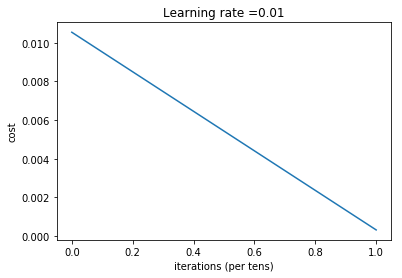

Train accuracy:  0.0044355267
Test accuracy:  -0.0015325419


In [35]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.01, num_epochs=100, print_cost=True, mini_batch_size=8):
    ops.reset_default_graph()
#     tf.set_random_seed(1)
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs=[]
    
    X, Y = create_placeholders(n_x, n_y)
    
    parameters = initialize_parameters(n_x, n_y)
    
    AL = forward_propagation(X, parameters)
    
    cost = compute_cost(AL, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0.
            num_minibatches = m/mini_batch_size
            minibatches = random_minibatches(X_train, Y_train)
            for minibatch in minibatches:
                minibatch_X, minibatch_Y = minibatch
                _, minibatch_cost = sess.run((optimizer, cost), feed_dict={X:minibatch_X, Y:minibatch_Y})
                epoch_cost += minibatch_cost/num_minibatches
                
            if print_cost == True:
                if epoch%50==0:
                    costs.append(epoch_cost)
                    if epoch%100==0:
                        print("Cost after epoch %i: %f" % (epoch, epoch_cost))
                        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        accuracy = tf.reduce_mean(1-AL/Y)

        print("Train accuracy: ", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test accuracy: ", accuracy.eval({X: X_test, Y: Y_test}))
    
    return parameters

parameters = model(X_train, y_train, X_val, y_val)

In [36]:
X_test = X_test.T
y_test=y_test.reshape(1, -1)

with tf.Session() as sess:
    X, Y = create_placeholders(17, 1)
    AL = forward_propagation(X, parameters)
    accuracy = tf.reduce_mean(tf.abs(1-AL/Y))
    print("Train accuracy: ", (1-accuracy.eval({X: X_train, Y: y_train}))*100,"%")
    print("Validation accuracy: ", (1-accuracy.eval({X: X_val, Y: y_val}))*100,"%")
    print("Test accuracy: ", (1-accuracy.eval({X: X_test, Y: y_test}))*100,"%")

Train accuracy:  98.54088965803385 %
Validation accuracy:  98.70213372632861 %
Test accuracy:  98.05798958986998 %


In [37]:
solar_data_2 = solar_data

solar_data_2['Month'] = solar_data_2['Date'].dt.month

solar_data_2 = Drop_Column(solar_data_2, 'Date')

solar_data_2['Downward Thermal Infrared Radiative Flux (kW-hr/m' + square + '/day)'] = solar_data_2.iloc[:,2].astype('float64')
solar_data_2['Month'] = solar_data_2['Month'].astype('float64')

Check(solar_data_2)

shape: (109700, 6)


,Latitude (°N),Longitude (°W),Downward Thermal Infrared Radiative Flux (kW-hr/m²/day),Top of Atmosphere Insolation (kW-hr/m²/day),All Sky Insolation (kW-hr/m²/day),Month
0,32.75,124.25,0.40,5.16,2.04,1.0
1,32.75,123.75,0.50,5.10,2.55,1.0
2,32.75,123.25,0.50,5.10,2.55,1.0
3,32.75,122.75,0.53,5.15,2.71,1.0
4,32.75,122.25,0.53,5.15,2.71,1.0


In [38]:
for month in Months:
    m = Months.index(month)
    solar_data_2[month] = [0]*len(solar_data_2)
    solar_data_2.loc[solar_data_2['Month'] == m+1, month] = 1

solar_data_2 = Drop_Column(solar_data_2,'Month')

Check(solar_data_2)

shape: (109700, 17)


,Latitude (°N),Longitude (°W),Downward Thermal Infrared Radiative Flux (kW-hr/m²/day),Top of Atmosphere Insolation (kW-hr/m²/day),All Sky Insolation (kW-hr/m²/day),JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,32.75,124.25,0.40,5.16,2.04,1,0,0,0,0,0,0,0,0,0,0,0
1,32.75,123.75,0.50,5.10,2.55,1,0,0,0,0,0,0,0,0,0,0,0
2,32.75,123.25,0.50,5.10,2.55,1,0,0,0,0,0,0,0,0,0,0,0
3,32.75,122.75,0.53,5.15,2.71,1,0,0,0,0,0,0,0,0,0,0,0
4,32.75,122.25,0.53,5.15,2.71,1,0,0,0,0,0,0,0,0,0,0,0


In [39]:
solar_data_norm = Normalize(solar_data_2)
solar_data_norm[1]

,Latitude (°N),Longitude (°W),Downward Thermal Infrared Radiative Flux (kW-hr/m²/day),Top of Atmosphere Insolation (kW-hr/m²/day),All Sky Insolation (kW-hr/m²/day),JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,37.25,124.25,0.81,12.26,9.34,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [40]:
np.savetxt('Data/Neural Network/Normalized files/solar_data.txt', solar_data_norm[0].values)
np.savetxt('Data/Neural Network/Maximum Values/solar_data_max_values.txt', solar_data_norm[1].values)

In [41]:
Predict_X = np.loadtxt('Data/Neural Network/Normalized files/solar_data.txt', dtype=float)

In [42]:
Predict_X = replace_zeros(Predict_X)
Predict_X.shape

(109700, 17)

In [43]:
Predict_X = Predict_X.T
with tf.Session() as sess:
    X, Y = create_placeholders(17, 1)
    pred = forward_propagation(Predict_X, parameters)
    DNR_array = pred.eval()

In [44]:
DNR_array = DNR_array.T
DNR_max = np.loadtxt('Data/Neural Network/Maximum Values/solar_monthly_con_train_y_max_values.txt', dtype=float)
DNR_array = DNR_array*DNR_max
DNR_array

array([[4.00261081],
       [4.00261081],
       [4.00261081],
       ...,
       [4.07206387],
       [4.08349692],
       [5.08114091]])

In [45]:
Check(solar_data)

shape: (109700, 7)


,Latitude (°N),Longitude (°W),Downward Thermal Infrared Radiative Flux (kW-hr/m²/day),Top of Atmosphere Insolation (kW-hr/m²/day),All Sky Insolation (kW-hr/m²/day),Date,Month
0,32.75,124.25,0.40,5.16,2.04,2015-01-01,1
1,32.75,123.75,0.50,5.10,2.55,2015-01-01,1
2,32.75,123.25,0.50,5.10,2.55,2015-01-01,1
3,32.75,122.75,0.53,5.15,2.71,2015-01-01,1
4,32.75,122.25,0.53,5.15,2.71,2015-01-01,1


In [46]:
solar_data = Drop_Column(solar_data, 'Month')
solar_data['Direct Normal Radiation (kW-hr/m' + square + '/day)'] = DNR_array

In [47]:
Check(solar_data)

shape: (109700, 7)


,Latitude (°N),Longitude (°W),Downward Thermal Infrared Radiative Flux (kW-hr/m²/day),Top of Atmosphere Insolation (kW-hr/m²/day),All Sky Insolation (kW-hr/m²/day),Date,Direct Normal Radiation (kW-hr/m²/day)
0,32.75,124.25,0.40,5.16,2.04,2015-01-01,4.002611
1,32.75,123.75,0.50,5.10,2.55,2015-01-01,4.002611
2,32.75,123.25,0.50,5.10,2.55,2015-01-01,4.002611
3,32.75,122.75,0.53,5.15,2.71,2015-01-01,4.002611
4,32.75,122.25,0.53,5.15,2.71,2015-01-01,4.002611


In [51]:
data = solar_data.merge(wind_data)
Check(data)

shape: (109700, 14)


,Latitude (°N),Longitude (°W),Downward Thermal Infrared Radiative Flux (kW-hr/m²/day),Top of Atmosphere Insolation (kW-hr/m²/day),All Sky Insolation (kW-hr/m²/day),Date,Direct Normal Radiation (kW-hr/m²/day),Precepitation (mm/day),Specific Humidity at 2m (kg/kg),Relative Humidity at 2m (%),Surface Pressure (kPa),Temperature at 2m (℃),Wind Speed at 50m (m/s),Wind Direction at 50m (°)
0,32.75,124.25,0.40,5.16,2.04,2015-01-01,4.002611,0.01,0.007471,71.99,102.07,14.90,4.22,329.35
1,32.75,123.75,0.50,5.10,2.55,2015-01-01,4.002611,0.00,0.007259,71.27,102.06,14.61,4.28,326.40
2,32.75,123.25,0.50,5.10,2.55,2015-01-01,4.002611,0.00,0.007055,70.22,102.04,14.39,4.54,324.64
3,32.75,122.75,0.53,5.15,2.71,2015-01-01,4.002611,0.00,0.006846,68.94,102.02,14.21,4.72,323.93
4,32.75,122.25,0.53,5.15,2.71,2015-01-01,4.002611,0.00,0.006663,67.52,102.01,14.12,4.86,322.88
